In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("SaratogaHouses.csv")

In [3]:
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
x = dataset['centralAir']
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [5]:
pd.unique(dataset['centralAir'])

array(['No', 'Yes'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [10]:
x[:-1].head(5)

0     No
1     No
2     No
3     No
4    Yes
Name: centralAir, dtype: object

In [8]:
x[:-1]

0        No
1        No
2        No
3        No
4       Yes
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17      Yes
18       No
19       No
20       No
21       No
22      Yes
23       No
24       No
25       No
26       No
27       No
28       No
29      Yes
       ... 
1697     No
1698    Yes
1699    Yes
1700     No
1701    Yes
1702     No
1703    Yes
1704    Yes
1705     No
1706    Yes
1707     No
1708     No
1709     No
1710     No
1711    Yes
1712     No
1713     No
1714    Yes
1715     No
1716     No
1717     No
1718     No
1719     No
1720    Yes
1721     No
1722     No
1723     No
1724     No
1725     No
1726     No
Name: centralAir, Length: 1727, dtype: object

In [9]:
encoder.fit_transform(x[:-1])

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
fuel = dataset['fuel'].values

In [13]:
pd.unique(fuel)

array(['electric', 'gas', 'oil'], dtype=object)

In [14]:
fuel = encoder.fit_transform(fuel)

In [17]:
fuel[:20]

array([0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2])

In [18]:
fuel = fuel.reshape(-1, 1)
OneHot = OneHotEncoder()
fuel = OneHot.fit_transform(fuel)

C:\Users\hp\Anaconda3\envs\mlcc\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
fuel.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
fuel

<1728x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1728 stored elements in Compressed Sparse Row format>

##### Multiple Linear Regression

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [22]:
dataset = pd.read_csv("SaratogaHouses.csv")

In [23]:
LivingArea = dataset["livingArea"]
LandValue = dataset["landValue"]
rooms = dataset["rooms"]
CentralAir = dataset["centralAir"]
price = dataset["price"]

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
encoder = LabelEncoder()
CentralAir = encoder.fit_transform(CentralAir)
n = len(price)
x0 = np.ones(n)
X = np.array([x0, LivingArea, LandValue, rooms, CentralAir]).T
Y = np.array(price)
B = np.zeros(5)

In [26]:
std = StandardScaler()
X = std.fit_transform(X)
Y = Y.reshape(Y.shape[0], 1)
Y = std.fit_transform(Y)
X[:10]

C:\Users\hp\Anaconda3\envs\mlcc\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Anaconda3\envs\mlcc\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 0.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 0.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 0.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793],
       [ 0.        , -0.9729241 , -0.58716312,  0.41382706, -0.76221375],
       [ 0.        ,  1.60873645, -0.32153257,  0.41382706, -0.76221375],
       [ 0.        , -0.1500198 , -0.57002567,  0.84564659, -0.76221375],
       [ 0.        , -0.19842594, -0.35295124,  0.41382706, -0.76221375],
       [ 0.        , -0.54695011, -0.38151366, -0.44981202, -0.76221375]])

In [27]:
def Cost_function(X, Y, B):
    h = np.sum(((X.dot(B) - Y)**2)) / (2*n)
    return h

In [28]:
Cost_function(X, Y, B)

864.0000000000001

In [44]:
def gradient_descent(X,y,B,epoach, alpha):
    cost_history = [0]*epoach
    
    for i in range(epoach):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = Cost_function(X,y,B)
    return cost_history, B     

In [58]:
cost, b = gradient_descent(X,Y.flatten(),B,epoach=1110, alpha = 0.01)

In [59]:
b

array([0.        , 0.50472654, 0.3295355 , 0.04839289, 0.10078757])

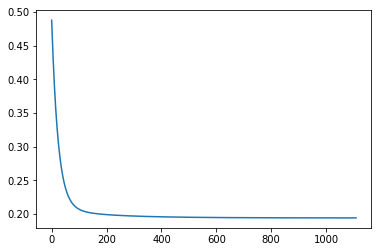

In [60]:
X1 = [i for i in range(1110)]
plt.plot(X1, cost)

##### Logistic Regression

In [41]:
import math

dataset = [
        [2.7810836,2.550537003,1],
    	[1.465489372,2.362125076,0],
    	[3.396561688,4.400293529,0],
    	[1.38807019,1.8502210317,0],
    	[3.106407232,3.0015305973,0],
    	[7.6217531214,2.759262235,1],
    	[5.3321441248,2.088626775,1],
    	[6.922596716,1.77106367,1],
    	[8.675418651,-0.242068655,1],
    	[7.673756466,3.508563011,1]
    ]
coef = [-0.406605464, 0.852573316, -1.104746259]

def predict(coef,row):
    y_pred = coef[0]
    for i in range(len(row)-1):
        y_pred += coef[i+1] * row[i]
    return 1/ (1+math.exp(-y_pred))


for row in dataset:
    pred = predict(coef,row)
    print("Prediction : {} , Actual : {}, Expected: {}".format(pred,row[-1],round(pred)))

Prediction : 0.2987569855650975 , Actual : 1, Expected: 0
Prediction : 0.14595105593031163 , Actual : 0, Expected: 0
Prediction : 0.08533326519733725 , Actual : 0, Expected: 0
Prediction : 0.21973717887537045 , Actual : 0, Expected: 0
Prediction : 0.254625061660804 , Actual : 0, Expected: 0
Prediction : 0.9544886165544029 , Actual : 1, Expected: 1
Prediction : 0.8620040601840602 , Actual : 1, Expected: 1
Prediction : 0.9717729050420985 , Actual : 1, Expected: 1
Prediction : 0.9992954520878627 , Actual : 1, Expected: 1
Prediction : 0.9054893228110497 , Actual : 1, Expected: 1
